In [3]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

/Users/shruti/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
from pandas.io.data import DataReader

/Users/shruti/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL', 'GOOG','MSFT','AMZN']

#Set up Start and End times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Loop to grab data from Yahoo stocks and setting into DataFrame

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [8]:
#Summary stats:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,116.556127,117.640869,115.258142,116.434466,5.038585e+07,115.171494
std,11.099521,10.914581,11.207555,11.006998,2.057234e+07,10.387567
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,110.269997,111.750000,108.800003,110.209999,3.636510e+07,109.147984
50%,117.339996,118.410004,116.059998,117.339996,4.596430e+07,116.706717
75%,126.279999,127.209999,125.260002,126.320000,5.623850e+07,124.223533
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [9]:
AMZN.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,516.171423,521.878814,509.535060,515.763638,4124097.628458,515.763638
std,95.491190,96.605022,93.234828,95.119721,2393981.620630,95.119721
min,367.109985,371.399994,365.649994,366.369995,1091200.000000,366.369995
25%,430.750000,434.239990,427.609985,430.920013,2620800.000000,430.920013
50%,523.650024,529.450012,515.770020,522.619995,3708100.000000,522.619995
75%,580.250000,588.809998,571.070007,580.210022,4739500.000000,580.210022
max,691.890015,696.440002,686.380005,693.969971,21909400.000000,693.969971


In [10]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,633.744690,639.626529,626.759676,633.193515,2178970.750988,633.193515
std,82.336856,83.625178,80.482227,82.023715,1155804.238010,82.023715
min,519.500000,522.734009,515.179993,516.830017,527200.000000,516.830017
25%,541.032425,547.109985,538.382457,542.510010,1525700.000000,542.510010
50%,634.400024,640.000000,625.559998,633.729980,1893500.000000,633.729980
75%,713.669983,718.854980,703.080017,711.669983,2333100.000000,711.669983
max,784.500000,789.869995,766.900024,776.599976,11164900.000000,776.599976


In [11]:
MSFT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,47.965929,48.474783,47.504190,48.008696,3.655802e+07,47.281608
std,4.530536,4.538400,4.443791,4.499184,1.557973e+07,4.714965
min,40.340000,40.740002,39.720001,40.290001,9.009100e+06,39.219761
25%,44.340000,44.730000,43.840000,44.259998,2.734780e+07,43.491675
50%,46.980000,47.450001,46.529999,47.000000,3.276820e+07,46.155274
75%,52.340000,52.950001,51.570000,52.290001,3.970140e+07,51.956956
max,56.470001,56.849998,56.290001,56.549999,1.352271e+08,56.146870


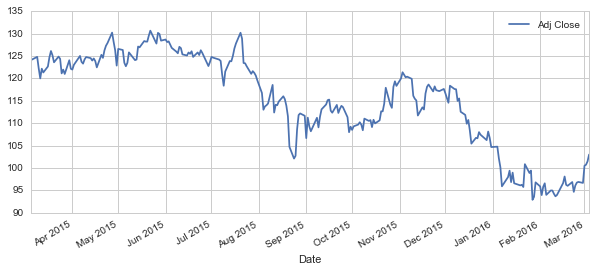

In [12]:
#Lets look at the graph of the volume and closing stock price for Apple
AAPL['Adj Close'].plot(legend = True, figsize =(10,4))

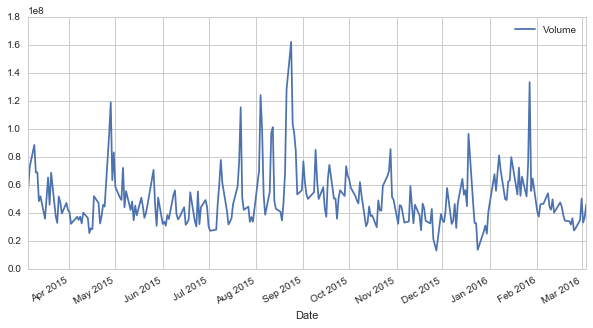

In [13]:
#Now the total volume of stock being traded each day 
AAPL['Volume'].plot(legend = True, figsize = (10,5))

In [14]:
#Moving average for the stock:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'], ma)

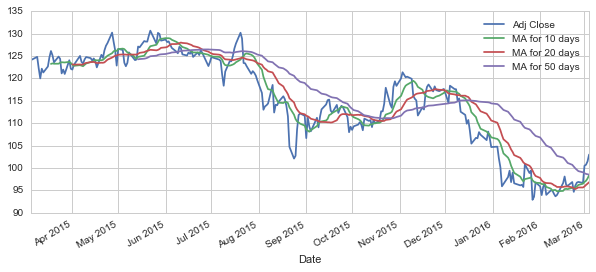

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


Next, we will be looking into the risk analysis of stocks for Apple in this case

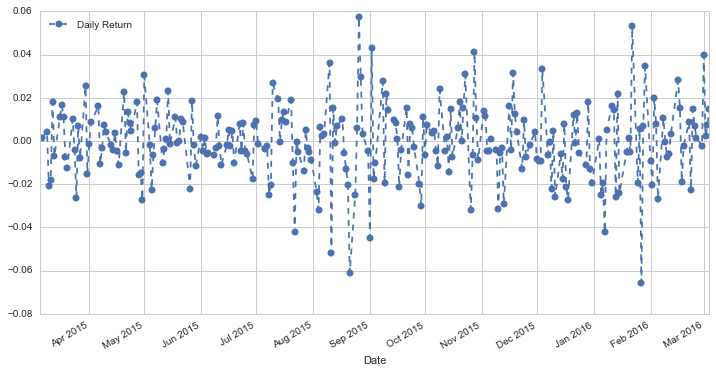

In [16]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,6),legend = True, linestyle="--",marker = 'o')

To get an idea of the overall look of the average daily return using a histogram and a KDE plot 

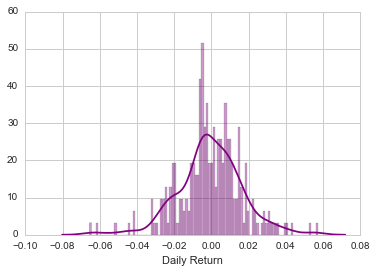

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

We can go ahead and analyze the returns of all the stocks in the list:

In [18]:
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [19]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-03-05,124.109352,387.829987,575.332609,41.964852
2015-03-06,124.295889,380.089996,567.687558,41.234775
2015-03-09,124.826061,378.559998,568.852557,41.711757
2015-03-10,122.243930,369.510010,555.012538,40.913539
2015-03-11,120.015240,366.369995,551.182515,40.864868


In [20]:
tech_rets = closing_df.pct_change()

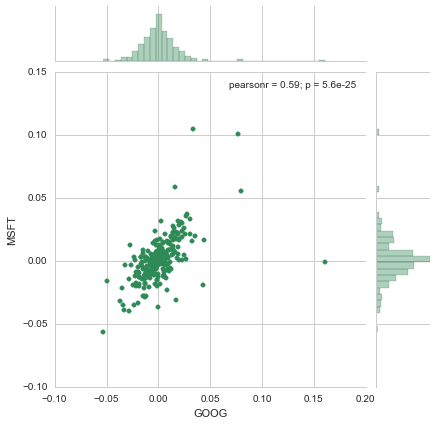

In [21]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color = 'seagreen')

To view comparisons for all possible combination of stocks:

/Users/shruti/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


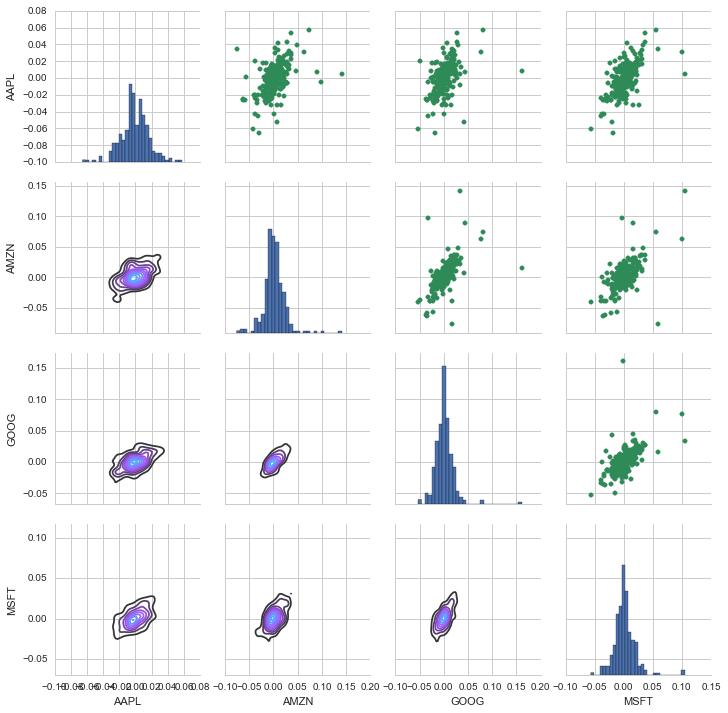

In [22]:
# set up a figure and call PairPlot on it
returns_fig = sns.PairGrid(tech_rets.dropna())

# specify the upper triangle of the map
returns_fig.map_upper(plt.scatter,color = 'seagreen')

# Define the lower triangle:
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Diagonal will be a series of histogram plots of thr daily returns:
returns_fig.map_diag(plt.hist,bins=30)

Amazon and Google look to have the strongest correlation of daily stock returm but overall, all these companies are positively correlated.

/Users/shruti/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/shruti/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


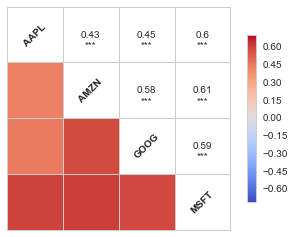

In [23]:
sns.corrplot(tech_rets.dropna(),annot=True)

    This heatmap check verifies the correlation between Amazon and Google

We can run a risk analysis by comparing expected return with standard deviation of daily returns

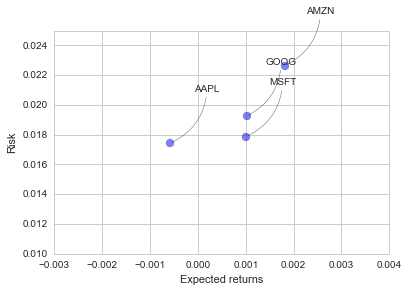

In [24]:
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot 
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

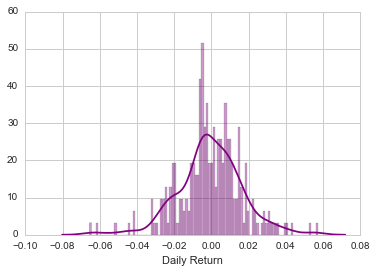

In [25]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = "purple" )

In [26]:
#The 0.05 empirical quantile of daily returns:
rets["AAPL"].quantile(0.95)

0.027989078717599977

So we can see now that with 95% confidence, our worst daily loss will not exceed 2.7%
I am going to verify this simple bootstrapping technique using the renouned Monte Carlo method. So that will involve running several trials and then calculating the [prtfolio losses for each trial to then see how risky the stock is.


In [27]:
#Set up time horizon
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [28]:
def stock_monte_carlo(start_price,days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [29]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-05,575.022616,577.912621,573.412609,575.332609,1389600,575.332609
2015-03-06,574.882583,576.682625,566.762536,567.687558,1659100,567.687558
2015-03-09,566.862541,570.272589,563.537566,568.852557,1062100,568.852557
2015-03-10,564.252539,564.852573,554.732534,555.012538,1792300,555.012538
2015-03-11,555.142533,558.142521,550.682486,551.182515,1820700,551.182515


In [30]:
start_price = 575.022616


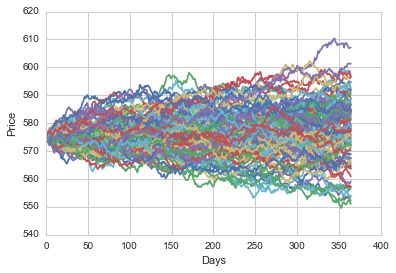

In [31]:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days, mu, sigma),)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.figure(figsize = (100,200))
plt.title('Monte Carlo Simulations for Google Stock Risk')

We can now get a histogram of the end results

In [32]:
#Set number of runs
runs = 1000

#Create empty matris to hold end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

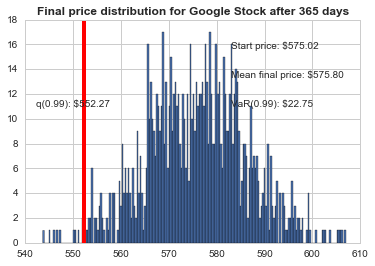

In [34]:
# Now we define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');